## From the class" week . Examples of instability

Week 4 Live Session (Passcode: Zd^c1M=* )

In [21]:
import numpy as np
import tensorflow as tf

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

plt.style.use('seaborn-v0_8-whitegrid')

Floating point numbers. You **have to choose** between using float 32 or 64. 64 has extra precision but is taking more memory

In [5]:
print(tf.float32.min)

-3.4028235e+38


In [6]:
print(tf.float32.max)

3.4028235e+38


In [7]:
print(tf.float64.max)
print(tf.float64.min)

1.7976931348623157e+308
-1.7976931348623157e+308


In [8]:
tf.math.log(tf.float32.max)

2023-05-31 20:00:06.696320: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 20:00:07.668696: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14626 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


<tf.Tensor: shape=(), dtype=float32, numpy=88.72284>

In [11]:
tf.math.log(tf.math.exp(80.0))  #this is fine

<tf.Tensor: shape=(), dtype=float32, numpy=80.0>

In [12]:
tf.math.log(tf.math.exp(89.0))   #infinite! numerical overflow

<tf.Tensor: shape=(), dtype=float32, numpy=inf>

Infinite can sometimes be used

In [15]:
tf.math.log(tf.math.exp(-88.0))
tf.math.exp(tf.math.log(tf.math.exp(-88.0)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [17]:
tf.math.log(tf.math.exp(-88.0))*0.0

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

Nan are highly contagious

In [18]:
aa = tf.constant(0.0)/tf.constant(0.0)
aa

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [19]:
aa + tf.constant(0.0)

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [20]:
tf.math.is_finite(aa)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

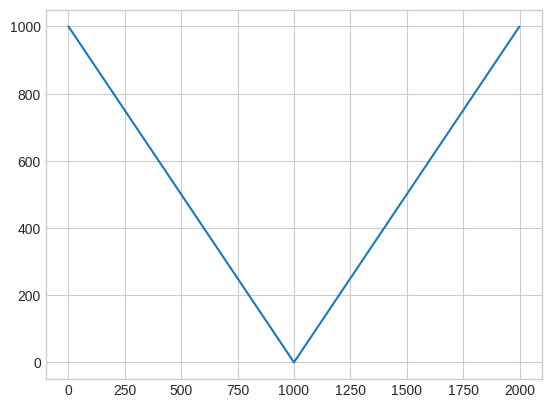

In [24]:
bb = tf.math.abs(tf.range(-1000,1000, dtype=tf.float32))
plt.plot(bb)
plt.show()

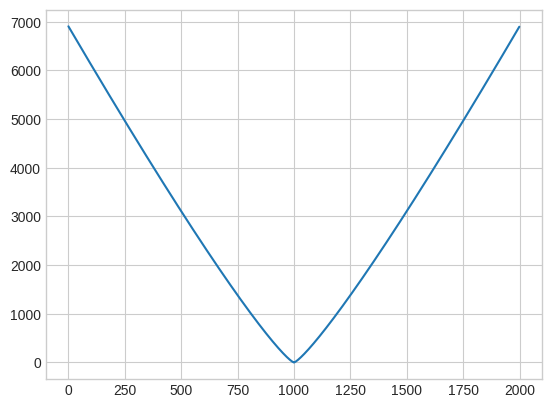

In [25]:
cc = tf.math.log(bb)*bb  # problem here as it is infinite*0
plt.plot(cc)  # deceiving as it looks normal in the plot

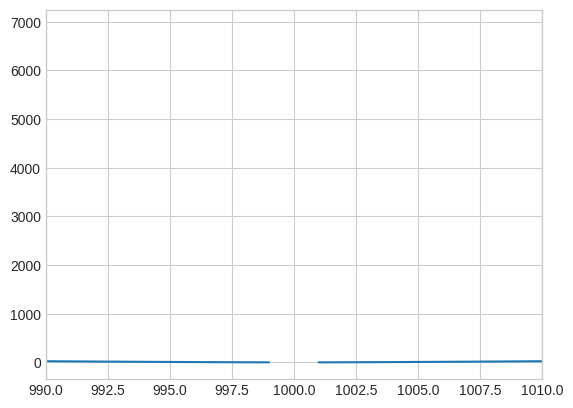

In [26]:
plt.xlim(990,1010)
plt.plot(cc)  # zooming in

In [27]:
#these operations will all be nan
tf.math.reduce_sum(cc)
tf.math.reduce_min(cc)
tf.math.reduce_max(cc)

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

### Softmax

Final activation layer. Having exponential terms it is susceptible to this problem. You don't want to have probability 0 or 1 exactly

In [28]:
x = np.array([100.0, 200.0])
tf.math.softmax(x)  # absolute certain

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0., 1.])>

In [32]:
x = np.array([1000.0, 2000.0])
tf.math.log(tf.math.softmax(x))   #  when we calculate the loss

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([-inf,   0.])>

In [36]:
x

array([1000., 2000.])

In [35]:
# Tactic
x = np.array([1000.0, 2000.0])
tf.math.log(tf.math.softmax(x) + 1e-6)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([-13.81551056,   0.000001  ])>

## Optimizers

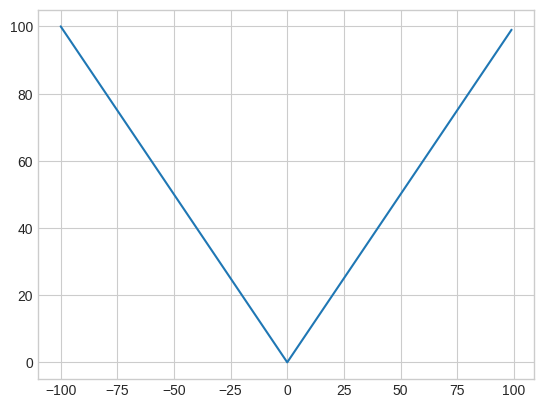

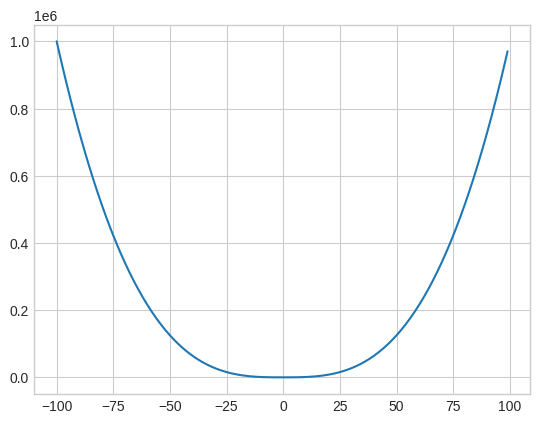

In [40]:
# use one dimensional example
@tf.function
def abloss(x):
    return tf.math.abs(x)

@tf.function
def cubicloss(x):
    return tf.math.abs(x**3)

xx = tf.range(-100,100, dtype=tf.float32)
plt.plot(xx, abloss(xx))
plt.show()

plt.plot(xx, cubicloss(xx))
plt.show()

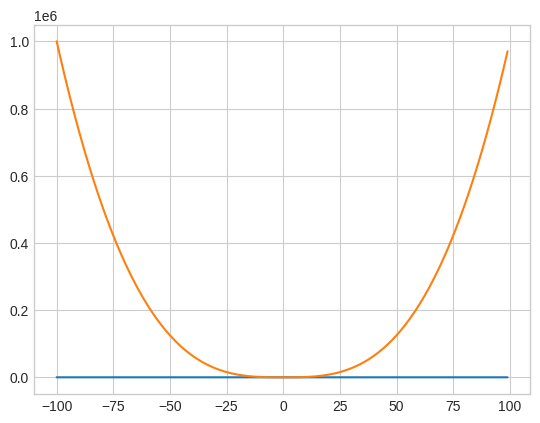

In [41]:
#plotted together
plt.plot(xx, abloss(xx))
plt.plot(xx, cubicloss(xx))
plt.show()

SGD

  0%|          | 0/1100 [00:00<?, ?it/s]

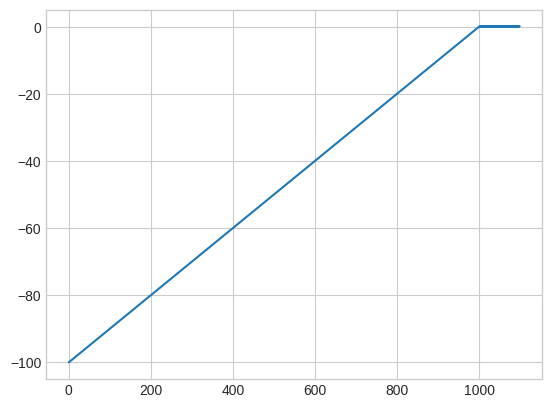

In [44]:
x = tf.Variable(-100, name = 'x', dtype = tf.float32)
lr = 1e-1
optimizer = tf.optimizers.SGD(lr)

xvals=[]
for epoch in tqdm(range(1100)):
    with tf.GradientTape() as tape:
        loss = abloss(x)
    xvals.append(x.numpy())
    gradients = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    
plt.plot(xvals)

  0%|          | 0/100 [00:00<?, ?it/s]

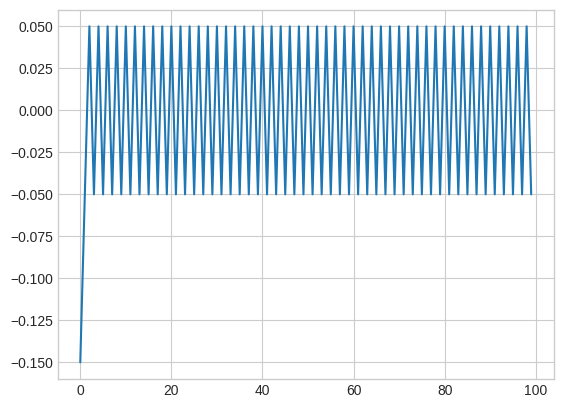

In [46]:
#close to zero

x = tf.Variable(-0.15, name = 'x', dtype = tf.float32)
lr = 1e-1
optimizer = tf.optimizers.SGD(lr)

xvals=[]
for epoch in tqdm(range(100)):
    with tf.GradientTape() as tape:
        loss = abloss(x)
    xvals.append(x.numpy())
    gradients = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    
plt.plot(xvals)

In [ ]:
# steep oscillation back and forth

cubicloss

  0%|          | 0/1000 [00:00<?, ?it/s]

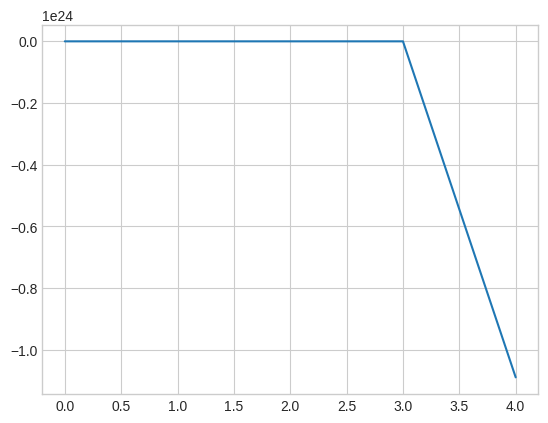

In [47]:
x = tf.Variable(-100, name = 'x', dtype = tf.float32)
lr = 1e-1
optimizer = tf.optimizers.SGD(lr)

xvals=[]
for epoch in tqdm(range(1000)):
    with tf.GradientTape() as tape:
        loss = cubicloss(x)
    xvals.append(x.numpy())
    gradients = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    
plt.plot(xvals)

  0%|          | 0/1000 [00:00<?, ?it/s]

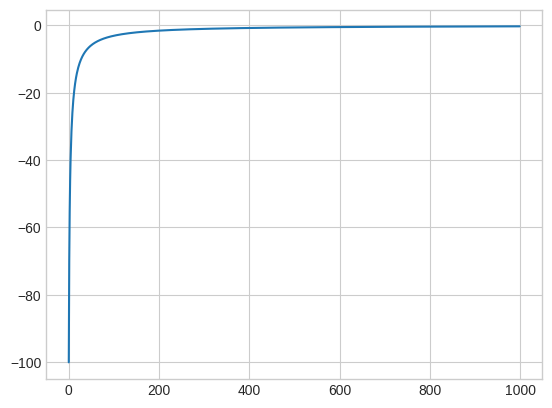

In [57]:
#reduce the step size
x = tf.Variable(-100, name = 'x', dtype = tf.float32)
lr = 1e-3
optimizer = tf.optimizers.SGD(lr)

xvals=[]
for epoch in tqdm(range(1000)):
    with tf.GradientTape() as tape:
        loss = cubicloss(x)
    xvals.append(x.numpy())
    gradients = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    
plt.plot(xvals)

### Adam
much faster but can be unstable

  0%|          | 0/1000 [00:00<?, ?it/s]

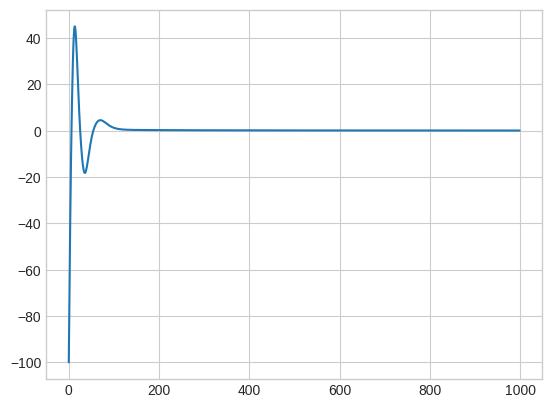

In [58]:
x = tf.Variable(-100, name = 'x', dtype = tf.float32)
lr = 20   #much larger learning rate - more less same as step size
optimizer = tf.optimizers.Adam(lr)

xvals_adam = []
for epoch in tqdm(range(1000)):
    with tf.GradientTape() as tape:
        loss = cubicloss(x)
    xvals_adam.append(x.numpy())
    gradients = tape.gradient(loss, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    
plt.plot(xvals_adam[:])

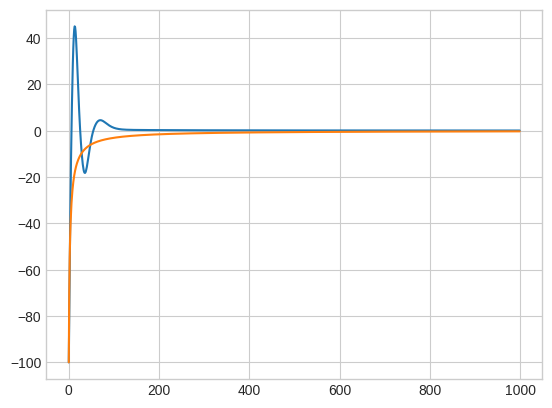

In [59]:
plt.plot(xvals_adam[0:])
plt.plot(xvals[0:])

### Example of error we could see in training

In [36]:
def logis_model(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

# cross entropy loss function
@tf.function
def loss(gt_labels,preds):
    return tf.reduce_mean(-tf.reduce_sum(gt_labels * tf.math.log(preds), axis=[1]))

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_classes = y_train.max() + 1
y_train_ohe = tf.one_hot(y_train, depth=n_classes)
y_test_ohe = tf.one_hot(y_test, depth=n_classes)
lr = 1e-1
optimizer = tf.optimizers.SGD(lr)
get_shape = sum(i.shape[0] for i in x_train[0])

In [37]:
W = tf.Variable(tf.zeros([get_shape,n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

In [38]:
epochs = range(1)

x_input = x_train.reshape(-1, get_shape).astype(np.float32)/1.0   # not divided by 255   

In [39]:
for epoch in epochs:
    with tf.GradientTape() as tape:
        prediction = logis_model(x_input)
        current_loss = loss(y_train_ohe, prediction)
        print("Current loss:", current_loss.numpy())
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

Current loss: 2.3025854


In [ ]:
#almost instantanously we get the nan value

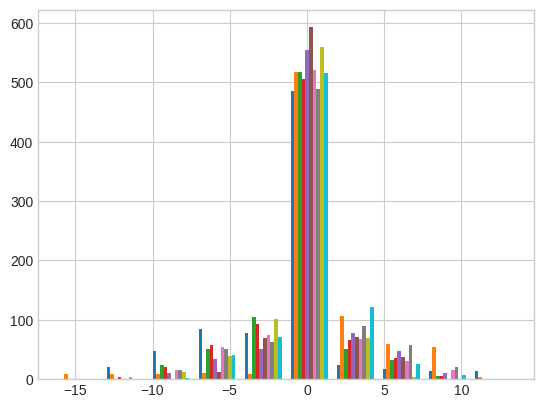

In [40]:
plt.hist(gradients[0].numpy())   #plotted for epochs=range(1) so just one step
plt.show()

### there are some large values, not huge

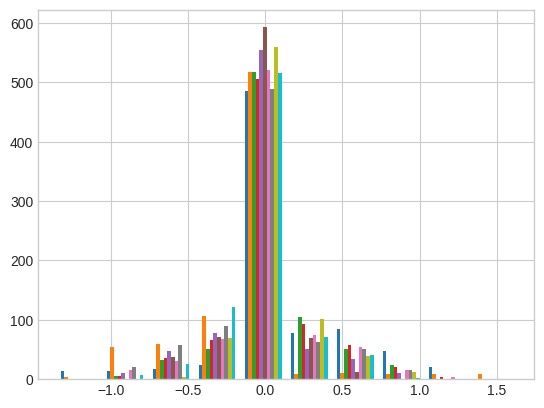

In [41]:
#  same for W
plt.hist(W.numpy())
plt.show()

In [42]:
# but for matrix multiplication are big
xx = tf.matmul(x_input, W) +b

In [43]:
xx[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 5126.9272 , -6163.9077 ,   386.79504,  6220.987  , -6551.0474 ,
        -197.17809,  -183.05861, -1141.6777 ,  4196.7046 , -1694.1323 ],
      dtype=float32)>

In [44]:
# for softmax prediction is wrong
tf.nn.softmax(xx[0])

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [45]:
tf.math.log(tf.nn.softmax(xx[0]))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-inf, -inf, -inf,   0., -inf, -inf, -inf, -inf, -inf, -inf],
      dtype=float32)>

In [46]:
y_train_ohe[0]*tf.math.log(tf.nn.softmax(xx[0]))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ nan,  nan,  nan,   0.,  nan, -inf,  nan,  nan,  nan,  nan],
      dtype=float32)>

In [47]:
y_train_ohe[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [48]:
tf.reduce_sum(y_train_ohe[0]*tf.math.log(tf.nn.softmax(xx[0])), axis=[0])

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [30]:
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)>

In [31]:
b

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)>

In [29]:
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)>

to get around this you can rescale the values
or reduce the learning rate